In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [2]:
#! pip install folium

### Read in the public art data and examine the shape, head, and tail

In [3]:
art = pd.read_csv('../data/public_art.csv')
art.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)"


In [4]:
art.tail(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
130,Women Suffrage Memorial,LeQuire,Alan,"600 Charlotte Avenue, Nashville TN",Bronze sculpture,Sculpture,NaN,36.16527,-86.78382,"(36.16527, -86.78382)"
131,Youth Opportunity Center-STARS Nashville - Pea...,Rudloff,Andee,1704 Charlotte Ave.,House paint on vinyl,Mural,NaN,36.15896,-86.79900,"(36.15896, -86.799)"


In [5]:
art.shape

(132, 10)

### Let's explore these pandas methods, attributes, and accessors
 * .shape
 - .head()
 * .tail()
 - .columns
 - .drop()
 - .rename()
 - .query()
 - .loc[]
 - .iloc[]
 - [[]]

In [6]:
art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

In [7]:
sculptures = art.query('Type == "Sculpture"')
sculptures.shape

(61, 10)

In [8]:
my_list = ['Sculpture', 'Mural']
sculptures_and_murals = art.query("Type in @my_list")
sculptures_and_murals.shape

(99, 10)

In [9]:
#art.loc[art.Type == 'Sculpture']
first_five = art.iloc[0:5, 1:3]

In [10]:
first_five

,Last Name,First Name
0,Frost,Miley
1,Walker,Lin
2,Kennedy,Kim
3,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn
4,Ridley,Greg


In [11]:
artists = art[['Last Name', 'First Name']]
artists.head(2)

,Last Name,First Name
0,Frost,Miley
1,Walker,Lin


In [12]:
art = art.drop(columns = ['Mapped Location'])

In [13]:
art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude'],
      dtype='object')

In [14]:
art.columns = ['title', 'last', 'first', 'loc', 'med',
              'type', 'desc', 'lat', 'lng']

In [15]:
art = art.rename(columns = {'Title': 'title', 'Last Name': 'last_name', 'First Name': 'first_name',
           'Location': 'loc', 'Medium': 'medium',  
            'Desccription': 'desc', 'Latiitude': 'lat', 'Longitude': 'lng'})

### More exploration with pandas
 - .value_counts()
 - .to_frame()
 - .reset_index()
 - .describe()
 - .info()
 - .isnull.sum()

#### matplotlib - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#examples-using-matplotlib-pyplot-plot


In [16]:
art.head(2)

,title,last,first,loc,med,type,desc,lat,lng
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774


In [17]:
type_counts = art.type.value_counts()

In [18]:
#make series a df
type_counts = type_counts.to_frame()

#reset index resets to 0-based index and moves existing index to a column
type_counts = type_counts.reset_index()

In [19]:
type_counts.columns = ['type', 'count']
type_counts.head(3)

,type,count
0,Sculpture,61
1,Mural,38
2,Monument,16


In [20]:
type(type_counts)

pandas.core.frame.DataFrame

In [21]:
type_counts.describe()

,count
count,16.000000
mean,8.250000
std,17.043083
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,61.000000


In [22]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
title    132 non-null object
last     132 non-null object
first    122 non-null object
loc      131 non-null object
med      128 non-null object
type     132 non-null object
desc     87 non-null object
lat      132 non-null float64
lng      132 non-null float64
dtypes: float64(2), object(7)
memory usage: 9.4+ KB


In [23]:
art.isnull().sum()

title     0
last      0
first    10
loc       1
med       4
type      0
desc     45
lat       0
lng       0
dtype: int64

### Simplest horizontal barplot using matplotlib.pyplot

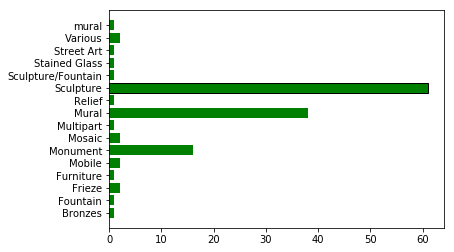

In [24]:
plt.barh('type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

### Fancier horizontal barplot with seaborn

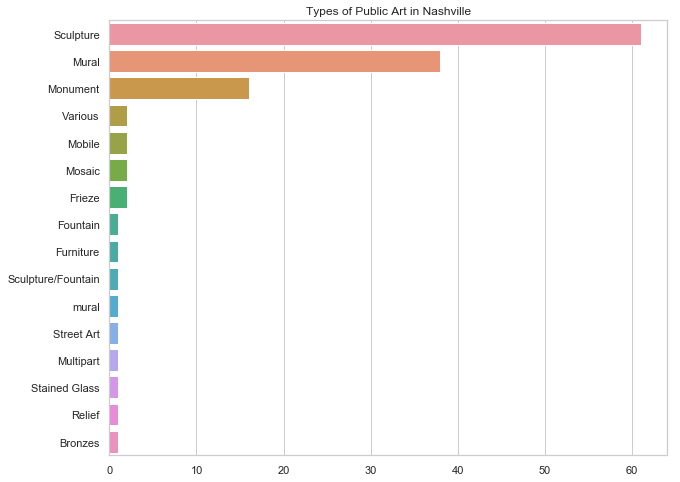

In [25]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
sns.barplot('count', 'type', data = type_counts)
plt.xlabel('')
plt.ylabel('')
plt.title('Types of Public Art in Nashville');

### Let's map the `art` types to fewer categories

In [26]:
# map Frieze, Sculpture/Fountain, Fountain, and Relief to Sculpture
# map Street Art, mural to Mural
# map Bronzes to Monument

art.type = art.type.map({'Sculpture': 'Sculpture', 'Mural': 'Mural', 'Frieze': 'Sculpture',
             'Monument': 'Monument', 'Mobile': 'Mobile', 'Furniture': 'Furniture',
             'Mosaic': 'Mosaic', 'Relief': 'Sculpture', 'Stained Glass': 'Stained Glass',
             'Bronzes': 'Monument', 'Sculpture/Fountain': 'Sculpture',
             'Various': 'Various', 'Street Art': 'Street Art', 'mural': 'Mural',
             'Fountain': 'Sculpture', 'Multipart': 'Multipart'})


In [27]:
art.type.unique()

array(['Sculpture', 'Mural', 'Monument', 'Mobile', 'Furniture', 'Mosaic',
       'Stained Glass', 'Various', 'Street Art', 'Multipart'],
      dtype=object)

In [28]:
# create new type counts from the revised data
type_counts_revised = art.type.value_counts()

# make series a df
type_counts_revised = type_counts_revised.to_frame()

# reset index resets to 0-based index and moves existing index to a column
type_counts_revised = type_counts_revised.reset_index()

type_counts_revised.columns = ['type', 'count']


In [29]:
type_counts_revised.head(2)

,type,count
0,Sculpture,66
1,Mural,39


### And redraw the horizontal barplot

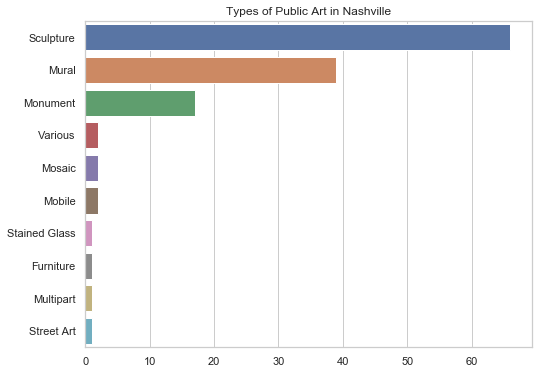

In [30]:
plt.figure(figsize = (8, 6))
sns.set(style="whitegrid")
sns.barplot('count', 'type', data = type_counts_revised)
plt.xlabel('')
plt.ylabel('')
plt.title('Types of Public Art in Nashville');

### Steps to create an aggregated dataset:
 1. Group by the columns you want to aggregate by with `df.groupby([col1, col2])`
 2. Use the `.agg()` or `.size()` to get a count for groups
 3. Keep the desired columns / drop the ones you don't need  
 4. Rename columns (use `df.sort_values()` with `ascending = False` to put the largest value first
 

In [31]:
# aggregate to get counts by type and artist
aggregated_art = art.groupby(['type', 'last', 'first']).agg('count').reset_index()

In [32]:
aggregated_art.head(2)

,type,last,first,title,loc,med,desc,lat,lng
0,Furniture,McGraw,Deloss,1,1,1,1,1,1
1,Mobile,Emery,Lin,1,1,1,1,1,1


In [33]:
aggregated_art = aggregated_art.iloc[0:,0:4]   
aggregated_art.columns = ['type', 'last_name', 'first_name','art_count']
aggregated_art = aggregated_art.sort_values('art_count', ascending = False)
aggregated_art.head()

,type,last_name,first_name,art_count
40,Sculpture,Faxon,Russell,9
51,Sculpture,LeQuire,Alan,6
57,Sculpture,Mims,Puryear,6
29,Mural,Rudloff,Andee,6
17,Mural,Cooper,Michael,6


In [34]:
multiple_works = aggregated_art.loc[aggregated_art.art_count > 1]
multiple_works.shape

(15, 4)

In [35]:
multiple_works.head()

,type,last_name,first_name,art_count
40,Sculpture,Faxon,Russell,9
51,Sculpture,LeQuire,Alan,6
57,Sculpture,Mims,Puryear,6
29,Mural,Rudloff,Andee,6
17,Mural,Cooper,Michael,6


### Creating a facet grid with seaborn
- set style if desired
- draw the grid
- map a plot to the grid

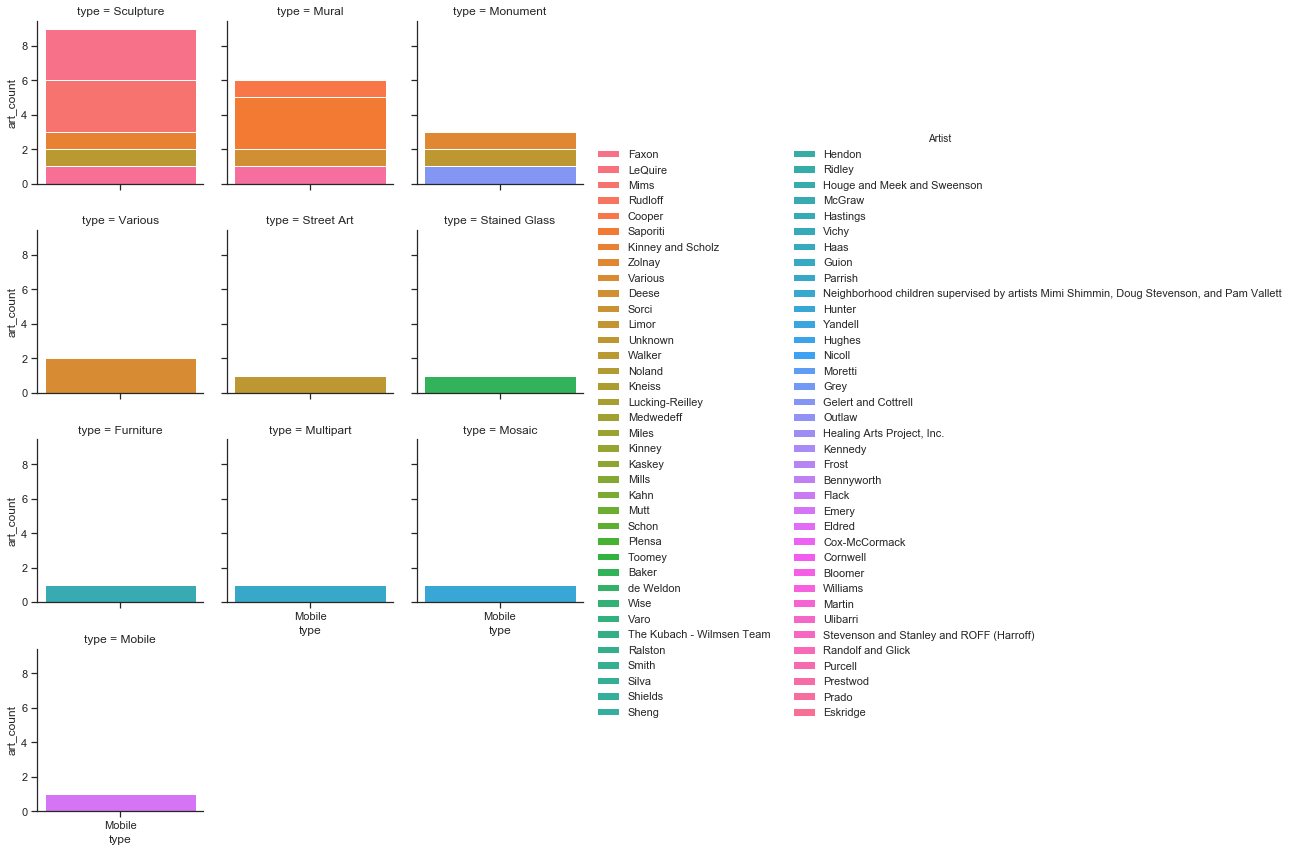

In [36]:
sns.set(style="ticks")


# Initialize a grid of plots with a column for each art type
grid = sns.FacetGrid(aggregated_art, 
                     col="type", hue="last_name", col_wrap=3)

# Draw a plot to show the trajectory of each country
grid.map(plt.bar, "type", "art_count")
grid.add_legend(ncol = 2, title = 'Artist');

### Markdown Basics  
<H3 style = "color: darkgreen;" > You can also use HTML for more advanced features! </H3>



_italics_   
*italics*  

__bold__  
**bold**

 - list item1  
 - list item2  
 
  
 2. ordered item1  
 1. ordered item2  
 

Here's a link to a helpful [markdown guide](https://www.markdownguide.org/basic-syntax).  
And another link to helpful **[HTML tags](https://www.w3schools.com/tags/)**.

### Creating a folium map

In [37]:
nashville = [36.1612, -86.7775]
nashville_map = folium.Map(location = nashville, zoom_start = 15)
nashville_map

In [38]:
art.head()

,title,last,first,loc,med,type,desc,lat,lng
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.15790,-86.78817
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.16202,-86.79975
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Sculpture,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205


In [39]:
nashville = [36.1612, -86.7775]
nashville_map = folium.Map(location = nashville, zoom_start = 15)

for index, row_values in art.iterrows():
    lat = row_values['lat']
    lng = row_values['lng']
    location = [lat, lng]
    
    
    art_title = row_values['title']
    if (row_values['desc']):
        description = row_values['desc']
    else:
        description = ''
    
    popup = str(art_title) + ': ' + str(description)
    popup = popup.replace("'", "`")
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(nashville_map)

display(nashville_map)

